In [14]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
np.set_printoptions(precision=4)

## Product Detection Workbook

## Task

In this competition, a multiple image classification model needs to be built. There are ~100k images within 42 different categories, including essential medical tools like masks, protective suits and thermometers, home & living products like air-conditioner and fashion products like T-shirts, rings, etc. For the data security purpose the category names will be desensitized. The evaluation metrics is top-1 accuracy.

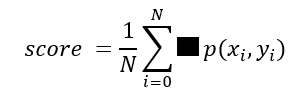

Where
- N is number of test samples.
- xi is the predicted category for i th test sample.
- yi is the ground truth for i th test sample.
- p(xi,yi) is calculated as 1 if xi=yi and 0 otherwise.
A higher score is better. In your practice you need to find a proper threshold to predict category name(string) instead of probabilities.

Submission File
Submission file format should be `csv` file only. And for each `filename` in the test dataset, you must predict only one proper category name.


## Solution Steps

## Data Processing

Since the data was from real word use cases, inspection needed to be done to ensure that the data is free from noise and losses. As such, typical pre-processing techniques would be use to de-noise the images dataset. A candidate for this would be to apply Gaussian smoothing to the image dataset.

Libraries for such functions would be OpenCV.

Quick inspection of the image dataset shows that the images are not in the same sizes, thus preprocessing has to be done to resize the images into a standardise size format. 

The following article outlines how we can choose the right image size for our image classification model.
https://towardsdatascience.com/boost-your-cnn-image-classifier-performance-with-progressive-resizing-in-keras-a7d96da06e20

Ideally, from this we can obtained a processed dataset from where a image classification model can be built from. In this case, we would be using a convolutional neural network to be trained on the dataset for prediction on the test dataset.

Image generator idea in keras & tensorflow could help with loading such large datasets which cannot fit in local memory.
https://machinelearningmastery.com/how-to-load-large-datasets-from-directories-for-deep-learning-with-keras/
https://www.tensorflow.org/guide/data

Due to the large dataset files, we will adopt the pre processing techniques outlined in the following blog post:
https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly

In [15]:
# Reading in raw test and training CSVs
trainDF = pd.read_csv("train.csv")
testDF = pd.read_csv("test.csv")

In [16]:
trainDF.sort_values(by=["category", 'filename'], inplace=True)

In [17]:
trainDF.head()

,filename,category
55380,00b32bd5ba9cdd7c2f11e3975b3e54fa.jpg,0
54316,00df3dd83ad6845e6fdfe675d755e17f.jpg,0
55035,00df7aa7afaa7c512b9a317adb0aae24.jpg,0
53410,00e6066eb828dcbe1755a4dabe189c06.jpg,0
54273,012c3848585c70f971a1621bae6c8410.jpg,0


In [18]:
# File paths to image data
DATADIR = "train//train"
CATEGORIES_INT = trainDF['category'].unique().tolist()
CATEGORIES = ["{:02d}".format((i)) for i in CATEGORIES_INT]

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
WD = os.getcwd()
PATH = os.path.join(os.path.join(WD), 'train')
TRAINING_PATH = os.path.join(PATH, 'train')
TRAINING_DIRS = os.listdir(TRAINING_PATH)
print(TRAINING_PATH)

D:\University\PersonalProjects\Shopee2020\Product\train\train


Create a dictionary called partition where you gather:

* in partition['train'] a list of training IDs
* in partition['validation'] a list of validation IDs

Upon further inspection of the dataset, a number of the data had malformed file extensions and were duplicates images:
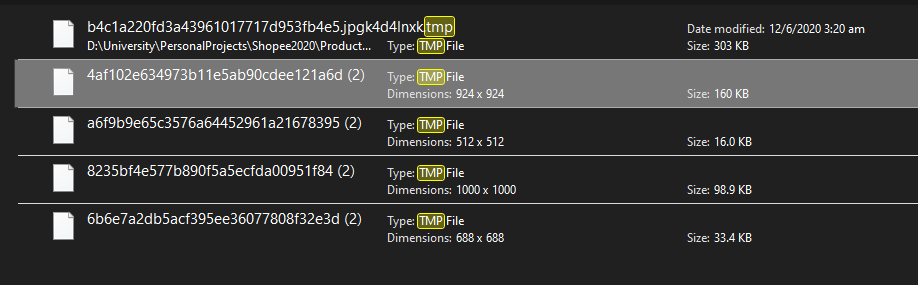

In [21]:
# download results from version 6 and run the following to extract the answer
results = pd.read_csv('results_1.csv', dtype={'filename': np.str})
results['filename'] = results['filename'].astype('str')
results.head()

,filename,category
0,0004b03ad7eabfb3989727c461310a84.jpg,[3.4334915e-04 1.1414855e-04 9.3259336e-04 4.5...
1,0004d34271d0a0253f8a95d0746bae05.jpg,[1.1150008e-02 3.5382312e-02 1.0902072e-02 6.2...
2,000d4ad3d0a372fd6eea2fee6bf738ef.jpg,[0.03237012 0.02390424 0.00770928 0.01761875 0...
3,0012f125ad07123e69468ae1d1d59de4.jpg,[1.97626199e-04 1.56370807e-05 5.87398594e-04 ...
4,0015831b249b856e569e883a9dc6d4fa.jpg,[0.00122824 0.00046203 0.00205435 0.00089472 0...


In [22]:
results = pd.read_csv('results_1.csv', dtype={'filename': np.str})
results['filename'] = results['filename'].astype('str')

def string_name(val):
    return str(val)

import re

results['filename'] = results['filename'].apply(string_name)
results['category'] = results['category'].apply(lambda val: re.sub("\s\s+" , " ", val).replace(' ', ','))
results['category'] = results['category'].apply(lambda val: eval(val))
results['category'] = results['category'].apply(lambda val: val.index(max(val)))
results['category'] = results["category"].apply(lambda x: "{:02}".format(x))
results.head()

,filename,category
0,0004b03ad7eabfb3989727c461310a84.jpg,22
1,0004d34271d0a0253f8a95d0746bae05.jpg,41
2,000d4ad3d0a372fd6eea2fee6bf738ef.jpg,21
3,0012f125ad07123e69468ae1d1d59de4.jpg,22
4,0015831b249b856e569e883a9dc6d4fa.jpg,32


In [23]:
final_ans = testDF.drop(columns='category').merge(results, on='filename', how='left')

In [24]:
final_ans.head()

,filename,category
0,fd663cf2b6e1d7b02938c6aaae0a32d2.jpg,38
1,c7fd77508a8c355eaab0d4e10efd6b15.jpg,05
2,127f3e6d6e3491b2459812353f33a913.jpg,29
3,5ca4f2da11eda083064e6c36f37eeb81.jpg,12
4,46d681a542f2c71be017eef6aae23313.jpg,12


In [25]:
final_ans.to_csv('answer_2.csv', index=False)